## Imports and Packages

In [17]:
## Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
## Neural Network Libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers
## Preprocessing and ML related libraries
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

## Exploratory Data Analysis (EDA)

In [18]:
df = pd.read_csv('insurance_claim_data.csv')
df

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Accident Date,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender
0,520.00,Rear end,E. 5 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-11-10 11:22:24.508901,2024-06-11 11:22:24.508901,13.0,33.0,4.0,Side collision at an intersection.,Whiplash and minor bruises.,Yes,Yes,Male
1,870.00,Rear end,B. 2 months,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2023-06-25 00:55:01.140228,2024-01-09 00:55:01.140228,4.0,45.0,2.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
2,2140.00,Other side pulled out of side road,G. 7 months,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-02-23 17:43:47.805561,2020-03-01 17:43:47.805561,9.0,45.0,4.0,Lost control on a snowy road.,Whiplash and minor bruises.,Yes,No,Female
3,520.00,Rear end - Clt pushed into next vehicle,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-10-02 04:36:32.118423,2021-10-13 04:36:32.118423,5.0,62.0,1.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
4,260.00,Rear end,C. 3 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-04-02 05:13:07.117423,2023-04-14 05:13:07.117423,9.0,78.0,1.0,Lost control on a snowy road.,Concussion and bruised ribs.,Yes,Yes,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,275.00,Other side turned across Clt's path,A. 1 month,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-08-25 19:24:19.731946,2022-06-30 19:24:19.731946,18.0,18.0,3.0,Hit a deer on the highway.,Concussion and bruised ribs.,No,No,Other
4996,1074.35,Other side pulled out of side road,H. 8 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-05-30 15:05:56.471294,2023-06-13 15:05:56.471294,NaN,70.0,4.0,Side collision at an intersection.,Fractured arm and leg.,Yes,No,Female
4997,2020.00,Other side pulled out of side road,F. 6 months,0.0,0.0,0.0,2020.0,0.0,0.0,0.0,...,2023-03-09 13:27:25.529105,2023-08-05 13:27:25.529105,11.0,43.0,1.0,Swerved to avoid another vehicle.,Minor cuts and scrapes.,No,Yes,Male
4998,781.20,Rear end - 3 car - Clt at front,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-02-09 05:32:42.392478,2023-10-18 05:32:42.392478,10.0,69.0,1.0,Lost control on a snowy road.,Sprained ankle and wrist.,No,No,Female


In [19]:
df.shape

(5000, 36)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SettlementValue             4894 non-null   float64
 1   AccidentType                4878 non-null   object 
 2   Injury_Prognosis            4844 non-null   object 
 3   SpecialHealthExpenses       4870 non-null   float64
 4   SpecialReduction            4879 non-null   float64
 5   SpecialOverage              4883 non-null   float64
 6   GeneralRest                 4872 non-null   float64
 7   SpecialAdditionalInjury     4866 non-null   float64
 8   SpecialEarningsLoss         4872 non-null   float64
 9   SpecialUsageLoss            4870 non-null   float64
 10  SpecialMedications          4870 non-null   float64
 11  SpecialAssetDamage          4889 non-null   float64
 12  SpecialRehabilitation       4884 non-null   float64
 13  SpecialFixes                4879 

### Studying The Target Variable

In [21]:
## Finding out how many Null Settlement Values there are
## Important in considering how to deal with the Null instances as SettlementValue is the target variable
df.loc[df['SettlementValue'].isnull()]

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Accident Date,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender
64,NaN,Rear end,G. 7 months,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,2020-06-29 04:48:03.456691,2020-07-24 04:48:03.456691,NaN,76.0,NaN,Hit a deer on the highway.,Minor cuts and scrapes.,No,No,Female
109,NaN,Rear end,H. 8 months,0.0,0.0,0.0,NaN,0.0,NaN,0.0,...,2023-05-30 22:06:30.318063,2024-01-18 22:06:30.318063,13.0,59.0,1.0,Rear-ended at a stoplight.,Sprained ankle and wrist.,No,No,Female
137,NaN,Rear end,F. 6 months,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,2023-03-22 02:51:40.940188,2023-07-13 02:51:40.940188,4.0,24.0,3.0,Hit a deer on the highway.,Whiplash and minor bruises.,Yes,No,Male
216,NaN,Rear end,A. 1 month,0.0,0.0,0.0,788.0,0.0,0.0,30.0,...,2023-03-26 12:00:08.641728,2023-11-04 12:00:08.641728,1.0,79.0,2.0,Hit a deer on the highway.,Concussion and bruised ribs.,Yes,Yes,Female
228,NaN,Rear end,F. 6 months,NaN,0.0,0.0,NaN,0.0,0.0,0.0,...,2020-09-24 12:36:43.640728,2020-11-08 12:36:43.640728,4.0,20.0,4.0,Hit a deer on the highway.,Fractured arm and leg.,No,Yes,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,NaN,Other,F. 6 months,0.0,0.0,0.0,2090.0,0.0,0.0,NaN,...,2023-05-31 12:07:38.011602,2024-02-08 12:07:38.011602,17.0,61.0,4.0,NaN,Whiplash and minor bruises.,No,No,Other
4882,NaN,Rear end,F. 6 months,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-25 05:46:49.281856,2020-06-05 05:46:49.281856,10.0,39.0,2.0,Lost control on a snowy road.,NaN,Yes,No,Other
4899,NaN,Rear end,E. 5 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,2021-01-23 20:01:29.297859,7.0,55.0,1.0,Rear-ended at a stoplight.,NaN,No,No,Male
4917,NaN,Rear end,E. 5 months,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,2023-02-09 05:32:42.392478,2024-01-08 05:32:42.392478,17.0,18.0,NaN,Rear-ended at a stoplight.,NaN,No,No,Other


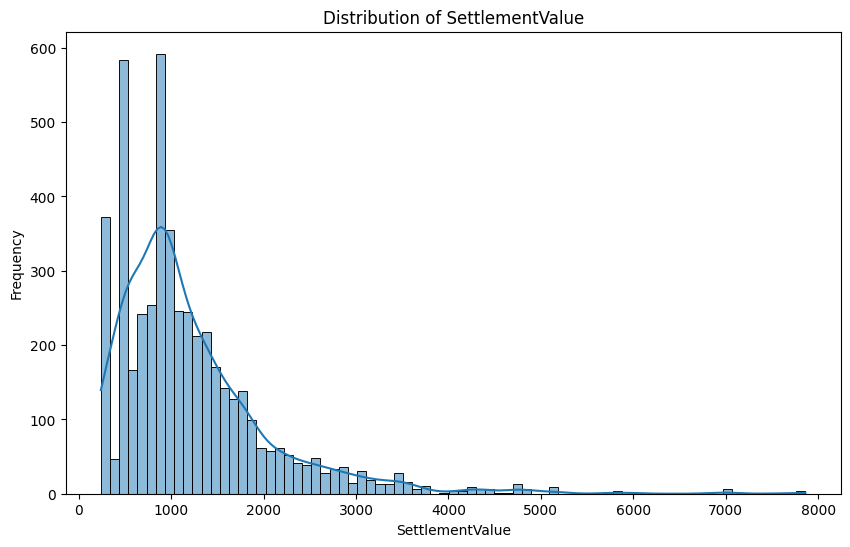

In [22]:
## From this plot we can see what is the Distribution of SettlementValue using a Barplot
plt.figure(figsize=(10,6))
sns.histplot(df['SettlementValue'],kde = True)
plt.title('Distribution of SettlementValue')
plt.xlabel('SettlementValue')
plt.ylabel('Frequency')
plt.show()

In [23]:
## Find out the Min,Max and Mean SettlementValue
print("Minimum SettlementValue :",min(df['SettlementValue']))
print("Maximum SettlementValue :",max(df['SettlementValue']))
print("Mean Settlementvalue :",round(np.mean(df['SettlementValue']), 2))

Minimum SettlementValue : 240.0
Maximum SettlementValue : 7862.9
Mean Settlementvalue : 1218.01


In [24]:
max_settlement = df.loc[df['SettlementValue'].idxmax()]
max_settlement

SettlementValue                                      7862.9
AccidentType                                       Rear end
Injury_Prognosis                                H. 8 months
SpecialHealthExpenses                                   0.0
SpecialReduction                                        0.0
SpecialOverage                                          0.0
GeneralRest                                             0.0
SpecialAdditionalInjury                                 0.0
SpecialEarningsLoss                                 7735.58
SpecialUsageLoss                                        0.0
SpecialMedications                                      0.0
SpecialAssetDamage                                      0.0
SpecialRehabilitation                                   0.0
SpecialFixes                                            0.0
GeneralFixed                                          895.0
GeneralUplift                                           0.0
SpecialLoanerVehicle                    

### Studying Feature Variables

In [25]:
## Finding out the type of Unique AccidentTypes 
unique_accidentTypes  = df['AccidentType'].unique()
unique_accidentTypes

array(['Rear end', 'Other side pulled out of side road',
       'Rear end - Clt pushed into next vehicle',
       'Other side pulled on to roundabout', nan,
       "Other side reversed into Clt's vehicle",
       "Other side changed lanes and collided with clt's vehicle",
       'Other', "Other side turned across Clt's path",
       'Other side drove on wrong side of the road',
       "Other side changed lanes on a roundabout colliding with clt's vehicle",
       'Rear end - 3 car - Clt at front',
       "Other side reversed into clt's stationary vehicle",
       "Other side collided with Clt's parked vehicle",
       "Other side pulled from parked position into the path of clt's vehicle",
       "Other side opened their door, hitting clt's vehicle",
       'Other side overtook and hit Clt when pulling in',
       'Other side overtook and pulled in too soon',
       'Other side overtook whilst clt was turning right'], dtype=object)

In [26]:
## Finding out about unique Accident Descriptions 
## Consider that we may be able to correlate AccidentTypes to AccidentDescriptions
unique_accidentDescriptions  = df['Accident Description'].unique()
unique_accidentDescriptions

array(['Side collision at an intersection.',
       'Lost control on a snowy road.', 'Hit a deer on the highway.',
       'Swerved to avoid another vehicle.', 'Rear-ended at a stoplight.',
       nan], dtype=object)

In [27]:
## Finding out the frequency of each of the AccidentTypes
df['AccidentType'].value_counts()

AccidentType
Rear end                                                                 2564
Other side pulled out of side road                                        570
Other                                                                     345
Other side turned across Clt's path                                       275
Rear end - Clt pushed into next vehicle                                   252
Other side changed lanes and collided with clt's vehicle                  188
Rear end - 3 car - Clt at front                                           154
Other side reversed into Clt's vehicle                                    100
Other side drove on wrong side of the road                                 99
Other side changed lanes on a roundabout colliding with clt's vehicle      84
Other side pulled on to roundabout                                         79
Other side reversed into clt's stationary vehicle                          62
Other side pulled from parked position into the pat

In [28]:
df['Accident Description'].value_counts()

Accident Description
Hit a deer on the highway.            1053
Rear-ended at a stoplight.             994
Lost control on a snowy road.          953
Side collision at an intersection.     947
Swerved to avoid another vehicle.      933
Name: count, dtype: int64

In [29]:
unique_genders = df['Gender'].unique()
print("Unique Genders: ", unique_genders)
gender_freq = df['Gender'].value_counts()
print(gender_freq)


Unique Genders:  ['Male' 'Female' 'Other']
Gender
Male      1684
Other     1669
Female    1647
Name: count, dtype: int64
